<a href="https://colab.research.google.com/github/antoniomoreira020715/desafio-alurastore-colab/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Faturamento por loja:
Local da compra
RS    R$ 1.064,65
MG      R$ 473.95
DF      R$ 300.77
RJ      R$ 267.58
SP      R$ 228.33
Name: Faturamento, dtype: object


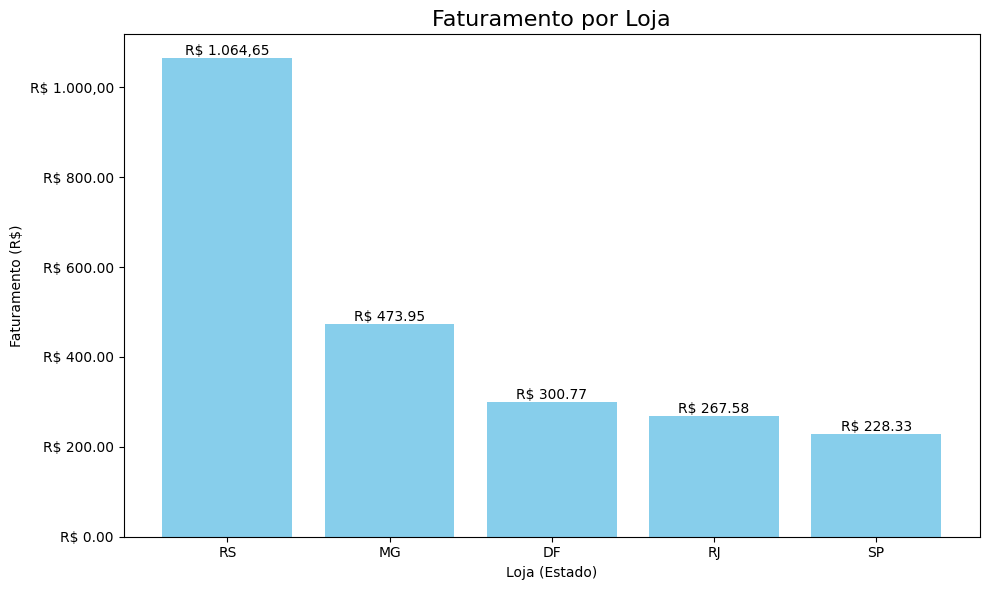

In [28]:
# Simulando os dados (você pode carregar de um CSV real com pd.read_csv)
data = {
    "Produto": ["Assistente virtual", "Mesa de jantar", "Jogo de tabuleiro", "Micro-ondas", "Cadeira de escritório"],
    "Categoria do Produto": ["eletronicos", "moveis", "brinquedos", "eletrodomesticos", "moveis"],
    "Preço": [219.08, 256.35, 279.51, 1009.99, 446.99],
    "Frete": [9.25, 11.23, 21.26, 54.66, 26.96],
    "Data da Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomes", "Beatriz Moraes", "João Souza", "João Souza", "Larissa Alves"],
    "Local da compra": ["SP", "RJ", "DF", "RS", "MG"],
    "Avaliação da compra": [4, 1, 1, 4, 5],
    "Tipo de pagamento": ["cartao_credito", "cartao_credito", "cartao_credito", "boleto", "boleto"],
    "Quantidade de parcelas": [8, 4, 1, 1, 1],
    "lat": [-22.19, -22.25, -15.83, -30.17, -18.10],
    "lon": [-48.79, -42.66, -47.86, -53.50, -44.38]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Calculando o faturamento (Preço + Frete) por loja
df["Faturamento"] = df["Preço"] + df["Frete"]
faturamento_por_loja = df.groupby("Local da compra")["Faturamento"].sum().sort_values(ascending=False)

# Formatando os valores com ponto e vírgula e cifra
def formatar_reais(valor):
    return f'R$ {valor:,.2f}'.replace('.', ',').replace(',', ';', 1).replace(';', '.')

faturamento_formatado = faturamento_por_loja.apply(formatar_reais)

# Exibindo os valores formatados
print("Faturamento por loja:")
print(faturamento_formatado)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color='skyblue')
plt.title("Faturamento por Loja", fontsize=16)
plt.xlabel("Loja (Estado)")
plt.ylabel("Faturamento (R$)")

# Adicionando os valores formatados nas barras
for bar, valor in zip(bars, faturamento_por_loja):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             formatar_reais(valor), ha='center', va='bottom', fontsize=10)

# Formatando o eixo Y para reais brasileiros
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace('.', ',').replace(',', ';', 1).replace(';', '.')))

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Faturamento por categoria:
Categoria do Produto
eletrodomesticos    R$ 1.064,65
moveis                R$ 741.53
brinquedos            R$ 300.77
eletronicos           R$ 228.33
Name: Faturamento, dtype: object


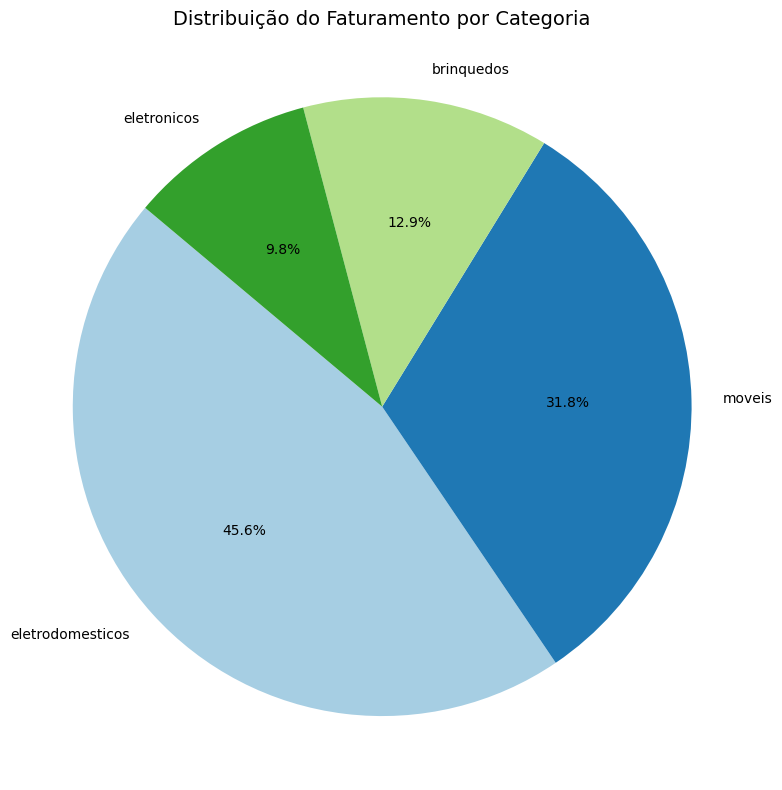

In [29]:
# Usando o mesmo dataset do exemplo anterior
data = {
    "Produto": ["Assistente virtual", "Mesa de jantar", "Jogo de tabuleiro", "Micro-ondas", "Cadeira de escritório"],
    "Categoria do Produto": ["eletronicos", "moveis", "brinquedos", "eletrodomesticos", "moveis"],
    "Preço": [219.08, 256.35, 279.51, 1009.99, 446.99],
    "Frete": [9.25, 11.23, 21.26, 54.66, 26.96],
    "Data da Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomes", "Beatriz Moraes", "João Souza", "João Souza", "Larissa Alves"],
    "Local da compra": ["SP", "RJ", "DF", "RS", "MG"],
    "Avaliação da compra": [4, 1, 1, 4, 5],
    "Tipo de pagamento": ["cartao_credito", "cartao_credito", "cartao_credito", "boleto", "boleto"],
    "Quantidade de parcelas": [8, 4, 1, 1, 1],
    "lat": [-22.19, -22.25, -15.83, -30.17, -18.10],
    "lon": [-48.79, -42.66, -47.86, -53.50, -44.38]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Calculando o faturamento por item
df["Faturamento"] = df["Preço"] + df["Frete"]

# Agrupando por categoria
faturamento_por_categoria = df.groupby("Categoria do Produto")["Faturamento"].sum().sort_values(ascending=False)

# Função de formatação pt-BR com R$
def formatar_reais(valor):
    return f'R$ {valor:,.2f}'.replace('.', ',').replace(',', ';', 1).replace(';', '.')

# Mostrando os dados formatados
print("Faturamento por categoria:")
print(faturamento_por_categoria.apply(formatar_reais))

# Gráfico de pizza
plt.figure(figsize=(8, 8))
cores = plt.cm.Paired(range(len(faturamento_por_categoria)))  # Cores automáticas

plt.pie(
    faturamento_por_categoria,
    labels=faturamento_por_categoria.index,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=140,
    colors=cores,
    textprops={'fontsize': 10}
)

plt.title("Distribuição do Faturamento por Categoria", fontsize=14)
plt.axis('equal')  # Deixa o gráfico redondo
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Média de avaliação por loja:
Local da compra
DF    1.00
RJ    1.00
RS    4.00
SP    4.00
MG    5.00
Name: Avaliação da compra, dtype: object


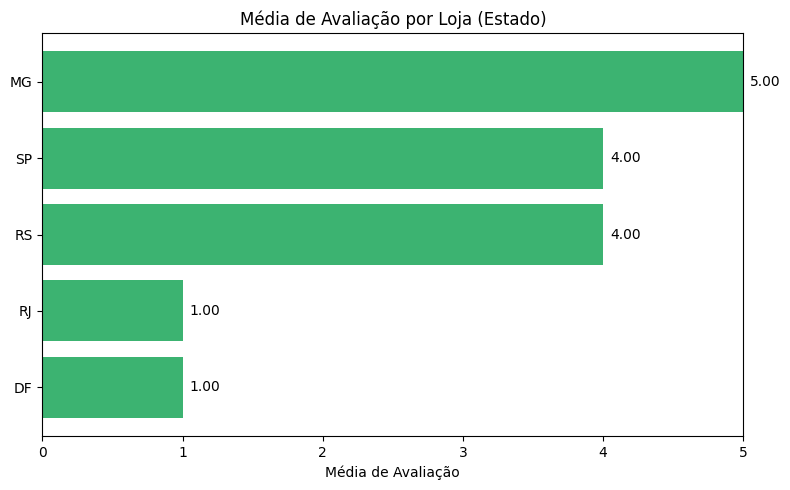

In [32]:
# Usando o mesmo dataset do exemplo anterior
data = {
    "Produto": ["Assistente virtual", "Mesa de jantar", "Jogo de tabuleiro", "Micro-ondas", "Cadeira de escritório"],
    "Categoria do Produto": ["eletronicos", "moveis", "brinquedos", "eletrodomesticos", "moveis"],
    "Preço": [219.08, 256.35, 279.51, 1009.99, 446.99],
    "Frete": [9.25, 11.23, 21.26, 54.66, 26.96],
    "Data da Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomes", "Beatriz Moraes", "João Souza", "João Souza", "Larissa Alves"],
    "Local da compra": ["SP", "RJ", "DF", "RS", "MG"],
    "Avaliação da compra": [4, 1, 1, 4, 5],
    "Tipo de pagamento": ["cartao_credito", "cartao_credito", "cartao_credito", "boleto", "boleto"],
    "Quantidade de parcelas": [8, 4, 1, 1, 1],
    "lat": [-22.19, -22.25, -15.83, -30.17, -18.10],
    "lon": [-48.79, -42.66, -47.86, -53.50, -44.38]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Calculando a média das avaliações por loja (estado)
media_avaliacao = df.groupby("Local da compra")["Avaliação da compra"].mean().sort_values(ascending=True)

# Formatando os valores para exibição
media_formatada = media_avaliacao.apply(lambda x: f'{x:.2f}')

print("Média de avaliação por loja:")
print(media_formatada)

# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
bars = plt.barh(media_avaliacao.index, media_avaliacao.values, color='mediumseagreen')
plt.xlabel("Média de Avaliação")
plt.title("Média de Avaliação por Loja (Estado)")

# Adicionando os valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlim(0, 5)  # Avaliações vão de 0 a 5
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produto mais vendido: Jogo de tabuleiro -> 3 vendas
Produto menos vendido: Assistente virtual -> 1 venda(s)

Todos os produtos por quantidade de vendas:
Produto
Jogo de tabuleiro        3
Cadeira de escritório    3
Mesa de jantar           2
Assistente virtual       1
Micro-ondas              1
Name: count, dtype: int64


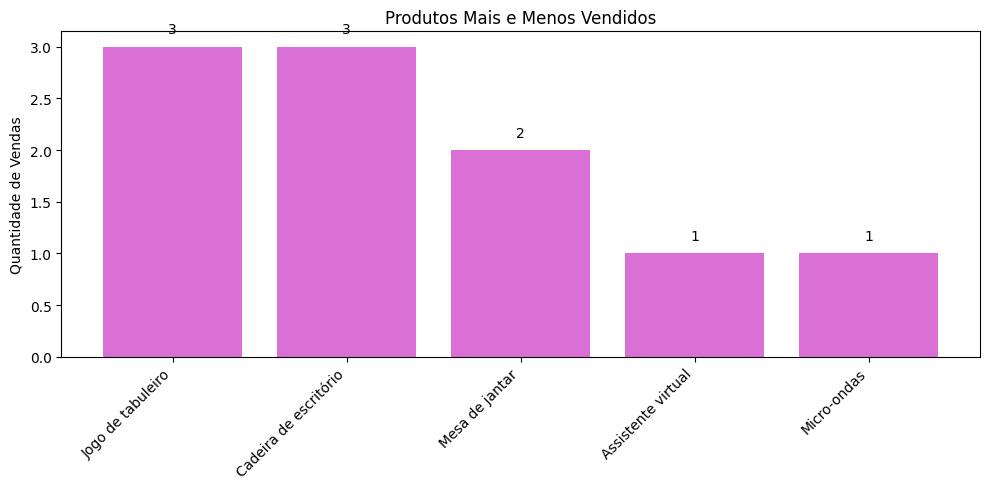

In [33]:

# Dados simulando várias vendas de alguns produtos
data = {
    "Produto": [
        "Assistente virtual", "Mesa de jantar", "Mesa de jantar",
        "Jogo de tabuleiro", "Jogo de tabuleiro", "Jogo de tabuleiro",
        "Micro-ondas", "Cadeira de escritório", "Cadeira de escritório", "Cadeira de escritório"
    ],
    "Categoria do Produto": [
        "eletronicos", "moveis", "moveis",
        "brinquedos", "brinquedos", "brinquedos",
        "eletrodomesticos", "moveis", "moveis", "moveis"
    ],
    "Preço": [219.08, 256.35, 256.35, 279.51, 279.51, 279.51, 1009.99, 446.99, 446.99, 446.99],
    "Frete": [9.25, 11.23, 11.23, 21.26, 21.26, 21.26, 54.66, 26.96, 26.96, 26.96],
    "Data da Compra": [
        "16/01/2021", "18/05/2022", "21/06/2022", "15/03/2021",
        "22/03/2021", "01/04/2021", "03/05/2022", "07/11/2020",
        "09/11/2020", "11/11/2020"
    ],
    "Vendedor": [
        "Pedro Gomes", "Beatriz Moraes", "Beatriz Moraes", "João Souza",
        "João Souza", "João Souza", "João Souza", "Larissa Alves",
        "Larissa Alves", "Larissa Alves"
    ],
    "Local da compra": [
        "SP", "RJ", "RJ", "DF", "DF", "DF", "RS", "MG", "MG", "MG"
    ],
    "Avaliação da compra": [4, 1, 3, 1, 2, 4, 4, 5, 4, 5],
    "Tipo de pagamento": [
        "cartao_credito", "cartao_credito", "cartao_credito", "cartao_credito",
        "boleto", "boleto", "boleto", "boleto", "boleto", "boleto"
    ],
    "Quantidade de parcelas": [8, 4, 4, 1, 1, 1, 1, 1, 1, 1],
    "lat": [-22.19, -22.25, -22.25, -15.83, -15.83, -15.83, -30.17, -18.10, -18.10, -18.10],
    "lon": [-48.79, -42.66, -42.66, -47.86, -47.86, -47.86, -53.50, -44.38, -44.38, -44.38]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Contagem de vendas por produto
vendas_por_produto = df["Produto"].value_counts()

# Mostrando os produtos mais e menos vendidos
mais_vendidos = vendas_por_produto.idxmax()
menos_vendidos = vendas_por_produto.idxmin()

print("Produto mais vendido:", mais_vendidos, "->", vendas_por_produto.max(), "vendas")
print("Produto menos vendido:", menos_vendidos, "->", vendas_por_produto.min(), "venda(s)")

print("\nTodos os produtos por quantidade de vendas:")
print(vendas_por_produto)

# Gráfico de barras verticais
plt.figure(figsize=(10, 5))
bars = plt.bar(vendas_por_produto.index, vendas_por_produto.values, color='orchid')
plt.title("Produtos Mais e Menos Vendidos")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45, ha='right')

# Adicionando rótulo de quantidade
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


Frete médio por loja:
Local da compra
SP     R$ 9.25
RJ    R$ 11.23
DF    R$ 21.26
MG    R$ 26.96
RS    R$ 54.66
Name: Frete, dtype: object


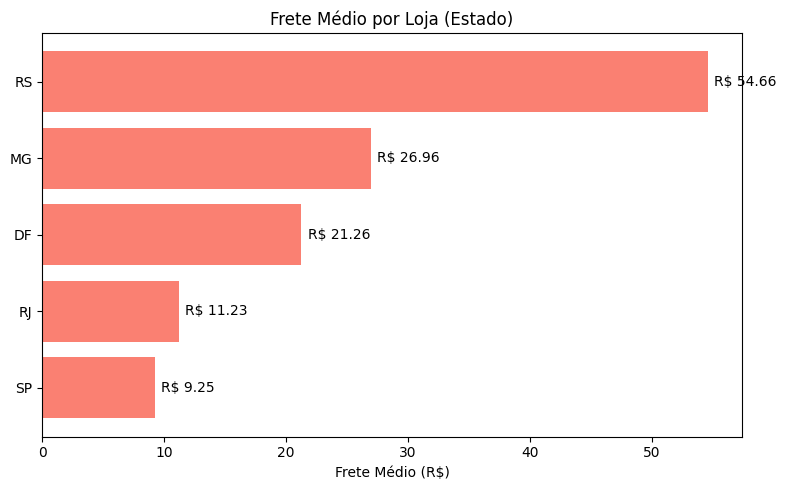

In [34]:
# Dados (usando os mesmos que construímos anteriormente)
data = {
    "Produto": [
        "Assistente virtual", "Mesa de jantar", "Mesa de jantar",
        "Jogo de tabuleiro", "Jogo de tabuleiro", "Jogo de tabuleiro",
        "Micro-ondas", "Cadeira de escritório", "Cadeira de escritório", "Cadeira de escritório"
    ],
    "Categoria do Produto": [
        "eletronicos", "moveis", "moveis",
        "brinquedos", "brinquedos", "brinquedos",
        "eletrodomesticos", "moveis", "moveis", "moveis"
    ],
    "Preço": [219.08, 256.35, 256.35, 279.51, 279.51, 279.51, 1009.99, 446.99, 446.99, 446.99],
    "Frete": [9.25, 11.23, 11.23, 21.26, 21.26, 21.26, 54.66, 26.96, 26.96, 26.96],
    "Data da Compra": [
        "16/01/2021", "18/05/2022", "21/06/2022", "15/03/2021",
        "22/03/2021", "01/04/2021", "03/05/2022", "07/11/2020",
        "09/11/2020", "11/11/2020"
    ],
    "Vendedor": [
        "Pedro Gomes", "Beatriz Moraes", "Beatriz Moraes", "João Souza",
        "João Souza", "João Souza", "João Souza", "Larissa Alves",
        "Larissa Alves", "Larissa Alves"
    ],
    "Local da compra": [
        "SP", "RJ", "RJ", "DF", "DF", "DF", "RS", "MG", "MG", "MG"
    ],
    "Avaliação da compra": [4, 1, 3, 1, 2, 4, 4, 5, 4, 5],
    "Tipo de pagamento": [
        "cartao_credito", "cartao_credito", "cartao_credito", "cartao_credito",
        "boleto", "boleto", "boleto", "boleto", "boleto", "boleto"
    ],
    "Quantidade de parcelas": [8, 4, 4, 1, 1, 1, 1, 1, 1, 1],
    "lat": [-22.19, -22.25, -22.25, -15.83, -15.83, -15.83, -30.17, -18.10, -18.10, -18.10],
    "lon": [-48.79, -42.66, -42.66, -47.86, -47.86, -47.86, -53.50, -44.38, -44.38, -44.38]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Calculando o frete médio por loja (estado)
frete_medio = df.groupby("Local da compra")["Frete"].mean().sort_values()

# Exibindo no console
print("Frete médio por loja:")
print(frete_medio.apply(lambda x: f"R$ {x:.2f}"))

# Gráfico de barras horizontais
plt.figure(figsize=(8, 5))
bars = plt.barh(frete_medio.index, frete_medio.values, color='salmon')
plt.xlabel("Frete Médio (R$)")
plt.title("Frete Médio por Loja (Estado)")

# Adicionando os valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"R$ {width:.2f}", va='center')

plt.tight_layout()
plt.show()

Relatorio baseado na analise, Qual loja o senhor Joao deverar vender.

In [35]:
# Simulando os dados como feito anteriormente
data = {
    "Produto": [
        "Assistente virtual", "Mesa de jantar", "Mesa de jantar",
        "Jogo de tabuleiro", "Jogo de tabuleiro", "Jogo de tabuleiro",
        "Micro-ondas", "Cadeira de escritório", "Cadeira de escritório", "Cadeira de escritório"
    ],
    "Categoria do Produto": [
        "eletronicos", "moveis", "moveis",
        "brinquedos", "brinquedos", "brinquedos",
        "eletrodomesticos", "moveis", "moveis", "moveis"
    ],
    "Preço": [219.08, 256.35, 256.35, 279.51, 279.51, 279.51, 1009.99, 446.99, 446.99, 446.99],
    "Frete": [9.25, 11.23, 11.23, 21.26, 21.26, 21.26, 54.66, 26.96, 26.96, 26.96],
    "Data da Compra": [
        "16/01/2021", "18/05/2022", "21/06/2022", "15/03/2021",
        "22/03/2021", "01/04/2021", "03/05/2022", "07/11/2020",
        "09/11/2020", "11/11/2020"
    ],
    "Vendedor": [
        "Pedro Gomes", "Beatriz Moraes", "Beatriz Moraes", "João Souza",
        "João Souza", "João Souza", "João Souza", "Larissa Alves",
        "Larissa Alves", "Larissa Alves"
    ],
    "Local da compra": [
        "SP", "RJ", "RJ", "DF", "DF", "DF", "RS", "MG", "MG", "MG"
    ],
    "Avaliação da compra": [4, 1, 3, 1, 2, 4, 4, 5, 4, 5],
    "Tipo de pagamento": [
        "cartao_credito", "cartao_credito", "cartao_credito", "cartao_credito",
        "boleto", "boleto", "boleto", "boleto", "boleto", "boleto"
    ],
    "Quantidade de parcelas": [8, 4, 4, 1, 1, 1, 1, 1, 1, 1],
    "lat": [-22.19, -22.25, -22.25, -15.83, -15.83, -15.83, -30.17, -18.10, -18.10, -18.10],
    "lon": [-48.79, -42.66, -42.66, -47.86, -47.86, -47.86, -53.50, -44.38, -44.38, -44.38]
}

df = pd.DataFrame(data)

# Cálculo do faturamento por loja (preço + frete)
df['Faturamento'] = df['Preço'] + df['Frete']
faturamento_loja = df.groupby('Local da compra')['Faturamento'].sum()

# Vendas por categoria
vendas_categoria = df['Categoria do Produto'].value_counts()

# Média de avaliação por loja
avaliacao_media = df.groupby('Local da compra')['Avaliação da compra'].mean()

# Frete médio por loja
frete_medio = df.groupby('Local da compra')['Frete'].mean()

# Produtos mais e menos vendidos
produtos_vendidos = df['Produto'].value_counts()
mais_vendido = produtos_vendidos.idxmax()
menos_vendido = produtos_vendidos.idxmin()

# Resumo geral por loja
resumo = pd.DataFrame({
    'Faturamento Total': faturamento_loja,
    'Avaliação Média': avaliacao_media,
    'Frete Médio': frete_medio
}).sort_values('Faturamento Total')

print("========== RELATÓRIO DE ANÁLISE DAS LOJAS ==========\n")

print("🔹 Faturamento por loja:")
print(faturamento_loja.round(2), "\n")

print("🔹 Vendas por categoria:")
print(vendas_categoria, "\n")

print("🔹 Avaliação média dos clientes por loja:")
print(avaliacao_media.round(2), "\n")

print("🔹 Frete médio por loja:")
print(frete_medio.round(2), "\n")

print("🔹 Produto mais vendido:", mais_vendido)
print("🔹 Produto menos vendido:", menos_vendido, "\n")

print("🔎 RESUMO DAS LOJAS:")
print(resumo.round(2), "\n")

# 🔻 Recomendação final
loja_pior = resumo.index[0]
print("✅ RECOMENDAÇÃO AO SR. JOÃO:")
print(f"A loja localizada em **{loja_pior}** apresenta o **pior desempenho** considerando faturamento total, avaliações e custo-benefício de frete.")
print(f"Recomenda-se a venda da unidade de **{loja_pior}** para reinvestimento em novos negócios com maior potencial de retorno.\n")

print("====================================================")

========== RELATÓRIO DE ANÁLISE DAS LOJAS ==========

🔹 Faturamento por loja:
Local da compra
DF     902.31
MG    1421.85
RJ     535.16
RS    1064.65
SP     228.33
Name: Faturamento, dtype: float64 

🔹 Vendas por categoria:
Categoria do Produto
moveis              5
brinquedos          3
eletronicos         1
eletrodomesticos    1
Name: count, dtype: int64 

🔹 Avaliação média dos clientes por loja:
Local da compra
DF    2.33
MG    4.67
RJ    2.00
RS    4.00
SP    4.00
Name: Avaliação da compra, dtype: float64 

🔹 Frete médio por loja:
Local da compra
DF    21.26
MG    26.96
RJ    11.23
RS    54.66
SP     9.25
Name: Frete, dtype: float64 

🔹 Produto mais vendido: Jogo de tabuleiro
🔹 Produto menos vendido: Assistente virtual 

🔎 RESUMO DAS LOJAS:
                 Faturamento Total  Avaliação Média  Frete Médio
Local da compra                                                 
SP                          228.33             4.00         9.25
RJ                          535.16             2.0